# Matter and Dark energy density
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
17 July 2023

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.max_open_warning': 20})

In [2]:
from LookbackTimeLib import *

In [3]:
# Case of recollapsing universe
a1=np.linspace(1e-5,acrit1-1e-8,2500)
t1a=-w0waCDM1.lookback_time(a2z(a1)).value # that's when the universe expands
t1b=2*tcrit1-t1a # that's when it recollapses. a is symmetric with respect to acrit
tmax=2*tcrit1-t1a[0] # maximum cosmic time considered
t1=np.concatenate([t1a,np.flip(t1b)])
a1=np.concatenate([a1,np.flip(a1)])

# Case of expanding-forever universes
amax=fsolve(lambda a : - w0waCDM4.lookback_time(a2z(a)).value - tmax, 3.)[0]
a2=a3=a4=np.linspace(1e-5,amax,5000)
t2=-w0waCDM2.lookback_time(a2z(a2)).value
t3=-w0waCDM3.lookback_time(a2z(a3)).value
t4=-w0waCDM4.lookback_time(a2z(a4)).value
tmin=min(t1a.min(),t2.min(),t3.min(),t4.min())

# find the time of dark energy domination
aDE=fsolve(lambda a : w0waCDM4.Om(a2z(1.))*a**(-3) - w0waCDM4.Ode(a2z(1.)), 1.)[0]
tDE=-w0waCDM4.lookback_time(a2z(aDE)).value

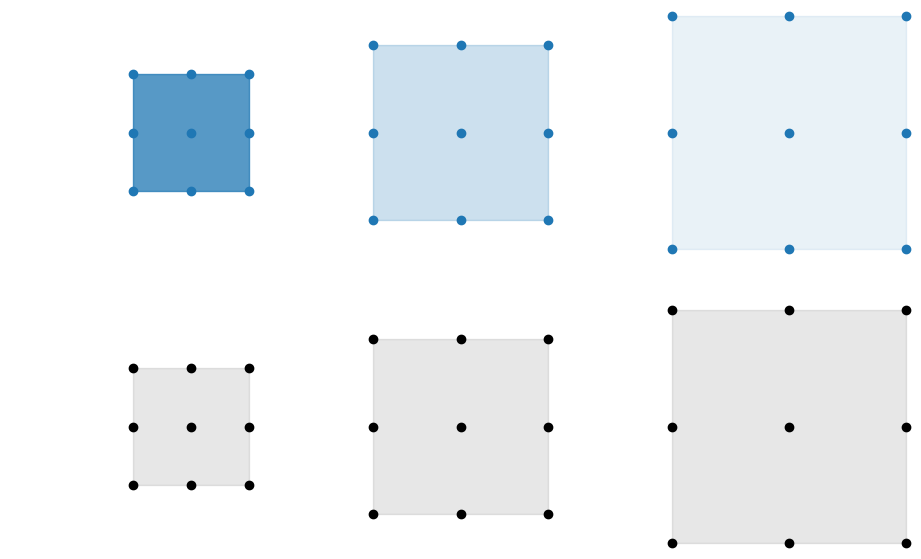

In [4]:
# Coordinates for the points
x = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1])
y = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1])

# Create the figure and axes
fig, ((ax0a, ax1a, ax2a), (ax0b, ax1b, ax2b)) = plt.subplots(2,3, figsize=(12,7))

# Plot the points
a0 = 0.5
a1 = 0.75
a2 = 1.
ax0a.scatter(a0*x+0.5, a0*y, color="C0")
ax1a.scatter(a1*x, a1*y, color="C0")
ax2a.scatter(a2*x, a2*y, color="C0")
ax0a.fill_between([-a0+0.5,a0+0.5],[-a0,-a0],[a0,a0], alpha=0.75*(a0/a0)**(-3), color="C0")
ax1a.fill_between([-a1,a1],[-a1,-a1],[a1,a1], alpha=0.75*(a1/a0)**(-3), color="C0")
ax2a.fill_between([-a2,a2],[-a2,-a2],[a2,a2], alpha=0.75*(a2/a0)**(-3), color="C0")
ax0b.scatter(a0*x+0.5, a0*y, color="black")
ax1b.scatter(a1*x, a1*y, color="black")
ax2b.scatter(a2*x, a2*y, color="black")
ax0b.fill_between([-a0+0.5,a0+0.5],[-a0,-a0],[a0,a0], alpha=0.75*(a2/a0)**(-3), color="black")
ax1b.fill_between([-a1,a1],[-a1,-a1],[a1,a1], alpha=0.75*(a2/a0)**(-3), color="black")
ax2b.fill_between([-a2,a2],[-a2,-a2],[a2,a2], alpha=0.75*(a2/a0)**(-3), color="black")

for ax in {ax0a,ax1a,ax2a,ax0b,ax1b,ax2b}:
    ax.axis('off')
    ax.set_xlim([-1.05,1.05])
    ax.set_ylim([-1.05,1.05])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')

fig.savefig("output/MatterAndDEDensity.png", dpi=300, bbox_inches='tight', transparent=True)

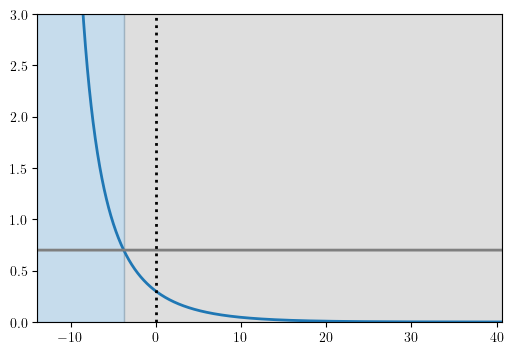

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_xlim([tmin,tmax])
ax.set_ylim([0.,3.])
ax.fill_between([tmin,tDE],[0.,0.],[3.,3.], color="C0", alpha=0.25)
ax.fill_between([tDE,tmax],[0.,0.],[3.,3.], color="C7", alpha=0.25)
ax.plot(t4, w0waCDM4.Om(a2z(1.))*a4**(-3), color="C0")
ax.plot(t4, w0waCDM4.Ode(a2z(1.))*np.ones_like(t4), color="C7")
ax.axvline(0., ls=":", color="black")

fig.savefig("output/MatterAndDEDensityvsTime.png", dpi=300, bbox_inches='tight', transparent=True)